## Experiment 4

---

### Using Gini-Stabilized with Linear function

In [1]:
include("../../src/Simulator.jl")

In [2]:
#Number of epochs to be simulated
n_epochs = 300000

#The type of Proof-of-Stake: Weighted, OppositeWeighted, GiniStabilized
proof_of_stake = GiniStabilized

#The initial volume of stakes in the pool
initial_stake_volume = 50000.0

#The initial distribution of tokens: Uniform, Gini, Random
initial_distribution = Gini

#The number of peers (or validators) in the blockchain
n_peers = 10000

#The number of corrupted peers (or validators) in the blockchain
n_corrupted = 0

#The probability that, in case a corrupted validator is chosen, it fails to validate the blockchain
p_fail = 0.5

#Probability of a new peer to join the pool at any epoch
p_join = 0.0

#Probability of a peer to quit the pool at any epoch
p_leave = 0.0

#The amount of tokens owned by the new peer
join_amount = NewRandom

#Percentage of coins removed from the corrupted validator in case he fails to validate the block
penalty_percentage = 0.5

#Constant reward earned by the validator
reward = 50.0
;

In [4]:
#Type of 's', to be set in case of GiniStabilized PoS. Choose between 'Constant' and 'Linear'
s_type = Linear

#Value of k. In case Constant has been chosen, 'k' will be used.
k = 1 / 10.0

#Target value for GiniStabilized PoS
θ = 0.3
;

In [5]:
#I create a basic set of parameters
parameters = Parameters()

#And i customize it with the ones written above
parameters.n_epochs = n_epochs
parameters.n_peers = n_peers
parameters.n_corrupted = n_corrupted
parameters.p_fail = p_fail
parameters.p_join = p_join
parameters.p_leave = p_leave
parameters.proof_of_stake = proof_of_stake
parameters.initial_stake_volume = initial_stake_volume
parameters.initial_distribution = Gini
parameters.join_amount = join_amount
parameters.penalty_percentage = penalty_percentage
parameters.reward = reward
parameters.s_type = s_type
parameters.k = k
parameters.θ = θ

#Notice that I did not set the initial_gini value, as I will set it individually for each experiment
parameters

Parameters(300000, GiniStabilized, 50000.0, Gini, 0.3, 10000, 0, 0.5, 0.0, 0.0, NewRandom, 0.5, 0.3, Linear, 0.1, 50.0)

In [6]:
history_collection = ThreadSafeDict()
peers_collection = ThreadSafeDict()

starting_ginis = [0.01, 0.2, 0.4, 0.6, 0.8]
#starting_ginis = [0.2]

@Threads.threads for i in 1:size(starting_ginis)[1]
    stakes = generate_peers(parameters.n_peers, 
                            parameters.initial_stake_volume, 
                            parameters.initial_distribution, 
                            starting_ginis[i]);

    corrupted = rand(1:parameters.n_peers, parameters.n_corrupted)
    
    history_collection[i], peers_collection[i] = simulate(stakes, corrupted, parameters);
end

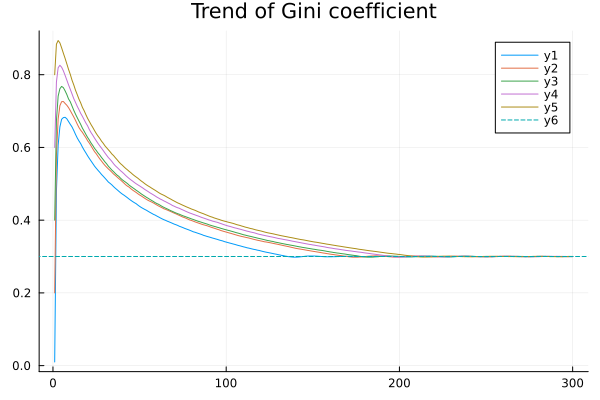

In [7]:
plot(history_collection[1][1:1000:end], title="Trend of Gini coefficient")
plot!(history_collection[2][1:1000:end])
plot!(history_collection[3][1:1000:end])
plot!(history_collection[4][1:1000:end])
plot!(history_collection[5][1:1000:end])
hline!([0.3], linestyle=:dash)

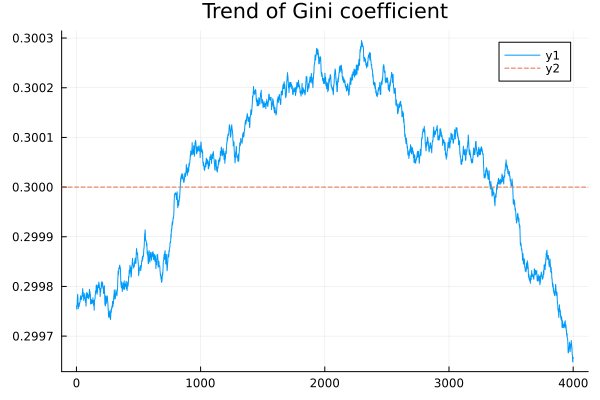

In [8]:
plot(history_collection[1][250000:5:270000], title="Trend of Gini coefficient")
#plot!(history_collection[2][300000:1:301000])
#plot!(history_collection[3][300000:1:301000])
#plot!(history_collection[4][300000:1:301000])
#plot!(history_collection[5][300000:1:301000])
hline!([0.3], linestyle=:dash)

In [ ]:
using DelimitedFiles

# Export the vector to a text file
writedlm("results/e1.txt", history_collection[1][1:1000:250000])
writedlm("results/e2.txt", history_collection[2][1:1000:250000])
writedlm("results/e3.txt", history_collection[3][1:1000:250000])
writedlm("results/e4.txt", history_collection[4][1:1000:250000])
writedlm("results/e5.txt", history_collection[5][1:1000:250000])

Now we try with a smaller $k$

In [10]:
k = 1 / 100.0

parameters.k = k

0.01

In [11]:
history_collection = ThreadSafeDict()
peers_collection = ThreadSafeDict()

starting_ginis = [0.01, 0.2, 0.4, 0.6, 0.8]
#starting_ginis = [0.2]

@Threads.threads for i in 1:size(starting_ginis)[1]
    stakes = generate_peers(parameters.n_peers, 
                            parameters.initial_stake_volume, 
                            parameters.initial_distribution, 
                            starting_ginis[i]);

    corrupted = rand(1:parameters.n_peers, parameters.n_corrupted)
    
    history_collection[i], peers_collection[i] = simulate(stakes, corrupted, parameters);
end

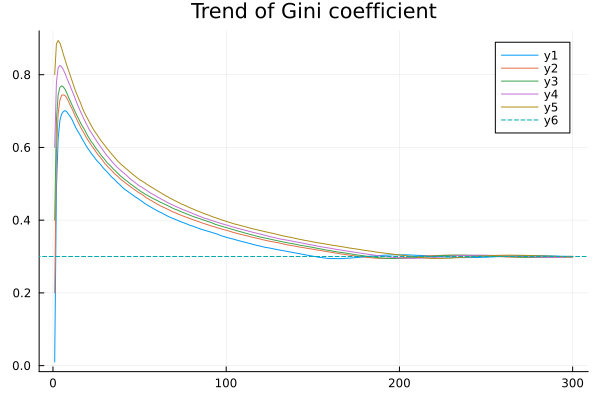

In [12]:
plot(history_collection[1][1:1000:end], title="Trend of Gini coefficient")
plot!(history_collection[2][1:1000:end])
plot!(history_collection[3][1:1000:end])
plot!(history_collection[4][1:1000:end])
plot!(history_collection[5][1:1000:end])
hline!([0.3], linestyle=:dash)

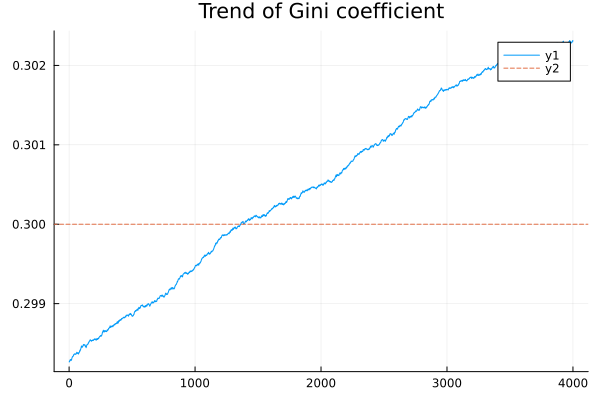

In [13]:
plot(history_collection[1][250000:5:270000], title="Trend of Gini coefficient")
#plot!(history_collection[2][300000:1:301000])
#plot!(history_collection[3][300000:1:301000])
#plot!(history_collection[4][300000:1:301000])
#plot!(history_collection[5][300000:1:301000])
hline!([0.3], linestyle=:dash)